<a href="https://colab.research.google.com/github/ggarciabas/ml_engineer/blob/ds/ds/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio  Machine Learning

## Leitura dos dados

- `monto`: montante (valor)
- `fecha`: data de compra
- `score`: do algoritmo já existente
- `fraude`: indica se foi fraude ou não 

In [1]:
import pandas as pd
# Cria Dataframe inicial
url='https://drive.google.com/file/d/1dRDvoSOtdtsgOG65UVKLTBlzejg_cX4P/view?usp=sharing' 
url2='https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
# https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
pd_dados = pd.read_csv(url2)

In [5]:
pd_dados

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,0.808366,2009.0,434.0,1,NaN,N,2020-04-11 19:31:07,47.15,95,0
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,0.989981,499.0,135.0,1,NaN,Y,2020-03-11 20:21:35,9.69,0,0
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,0.763939,127.0,127.0,1,NaN,Y,2020-03-11 19:36:07,5.97,15,0
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,0.382728,4373.0,123.0,1,NaN,Y,2020-03-16 07:13:24,25.83,59,0


## Análise do score atual

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

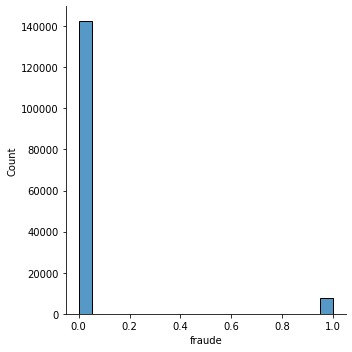

In [7]:
# distribuição dos casos de fraude e não fraude
sns.displot(data=pd_dados, x='fraude', kind='hist')

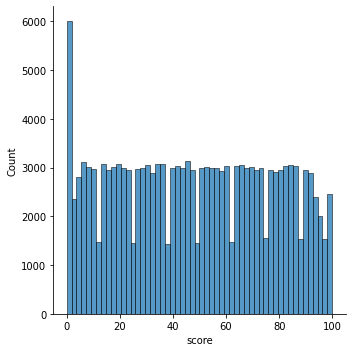

In [9]:
# distribuição dos scores
sns.displot(data=pd_dados, x='score', kind='hist')

In [2]:
# Taxa para lucro
import matplotlib.pyplot as plt
%matplotlib inline 
def valida_taxa (sF, f, m):
  if sF==0 and f==0:
    return m*0.1 # ganha 10%
  elif sF==0 and f==1:
    return -m # perde 100%
  elif sF==1 and f==0:
    return -(m*0.1) # deixou de ganhar 10%
  else: # se for fraude e capturar 
    return 0 
fraude = pd_dados['fraude']
pd_dados['saldoF'] = pd_dados[['fraude', 'monto']].apply(lambda x: x['monto']*0.1 if x['fraude']==0 else 0, axis=1)
cortes = range(0,100)
valor = []
for p in cortes:
  pd_dados['scoreF'] = pd_dados['score'].apply(lambda x: 0 if x<p else 1)
  saldo = pd_dados[['scoreF', 'fraude', 'monto']].apply(lambda x: valida_taxa(x['scoreF'], x['fraude'], x['monto']), axis=1).sum()
  valor.append(saldo)
def plot_corte_valor (A, B, ini, fim):
  plt.figure(figsize=(16,8))
  plt.plot(A[ini:fim], B[ini:fim], 'bx-')
  plt.xlabel('Corte')
  plt.ylabel('Saldo')
  plt.title('Ponto de corte para score e valor de ganho/custo (saldo)')
  plt.show()

In [3]:
print (f"Saldo ótimo: {pd_dados['saldoF'].sum()}")

Saldo ótimo: 598119.9


In [4]:
# Corte de maior valor
cMax = valor.index(max(valor))
print (f"Corte {cMax} para saldo de {max(valor)} (% do ótimo {max(valor)/pd_dados['saldoF'].sum()}")

Corte 86 para saldo de 151522.51200000002 (% do ótimo 0.2533313337342563


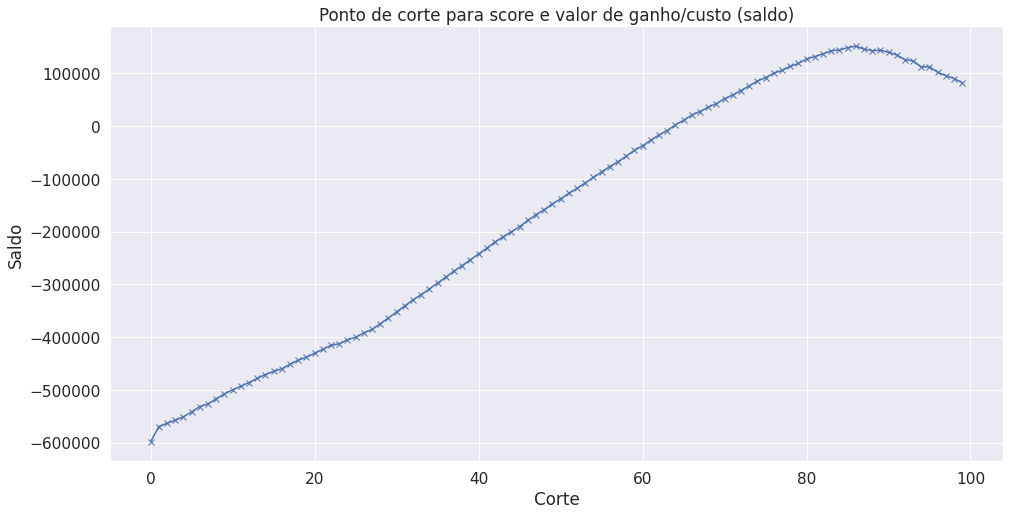

In [116]:
plot_corte_valor(cortes, valor, 0, 100)

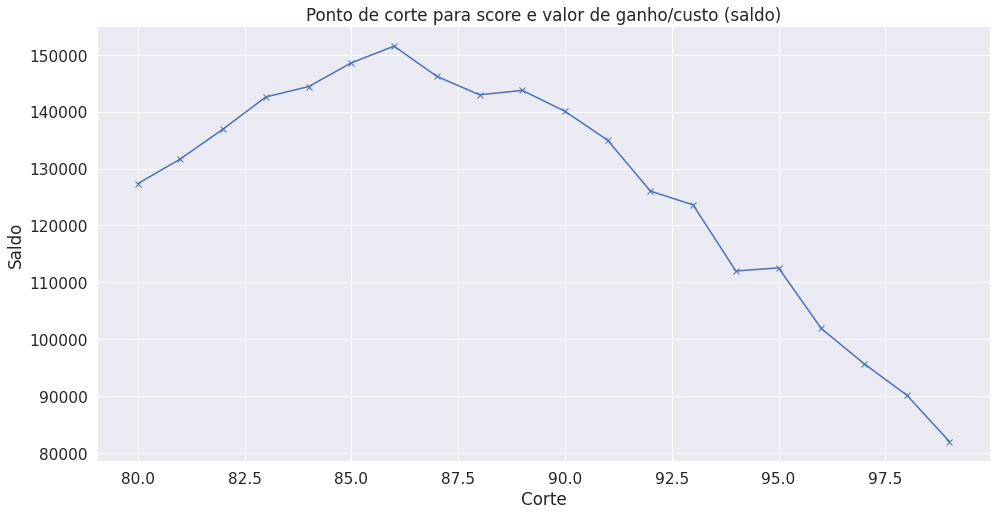

In [117]:
plot_corte_valor(cortes, valor, 80, 100)

In [5]:
# PuLP - vhttps://github.com/ggarciabas/brad_eficiencia/blob/master/pulp_agencia.ipynb

In [130]:
# Relatórios para corte de valor máximo de saldo
cMaxPred = pd_dados['score'].apply(lambda x: 0 if x<cMax else 1)
print (confusion_matrix(cMaxPred, fraude, labels=[1,0]))
print(classification_report(cMaxPred, fraude, labels=[1,0]))

[[  3677  15117]
 [  3823 127383]]
              precision    recall  f1-score   support

           1       0.49      0.20      0.28     18794
           0       0.89      0.97      0.93    131206

    accuracy                           0.87    150000
   macro avg       0.69      0.58      0.61    150000
weighted avg       0.84      0.87      0.85    150000



## Análise dos dados

In [19]:
pd_dados.count()

a          150000
b          137016
c          137016
d          149635
e          150000
f          149989
g          149806
h          150000
i          150000
j          150000
k          150000
l          149989
m          149635
n          150000
o           41143
p          150000
fecha      150000
monto      150000
score      150000
fraude     150000
saldoF     150000
scoreF     150000
fecha_d    150000
dtype: int64

### Total de transações por dia

In [13]:
# Filtra data sem hora
pd_dados['fecha_d'] = pd_dados['fecha'].apply(lambda x: x[:10])

In [14]:
# Período de transações
print(f"{pd_dados['fecha_d'].min()} até {pd_dados['fecha_d'].max()}")

2020-03-08 até 2020-04-21


In [83]:
def plot_fraudes_data (start=None, end=None)->tuple:
  pdf = pd_dados.copy()
  if start != None:
    pdf = pdf[(pdf['fecha_d']>=start)&(pdf['fecha_d']<=end)]
  pdf = pdf[['fecha_d', 'fraude','a']].groupby(['fecha_d', 'fraude']).count().reset_index()
  pdf = pdf.pivot(index="fecha_d", columns=["fraude"], values="a")
  print (f"Fraude {pdf[1].mean()} avg.\tGenuine: {pdf[0].mean()} avg.")
  pdf.plot()
  return pdf[1].sum(),pdf[0].sum()

Fraude 166.66666666666666 avg.	Genuine: 3166.6666666666665 avg.
Fraude: 7500 (0.05)	Genuine: 142500 (0.95)


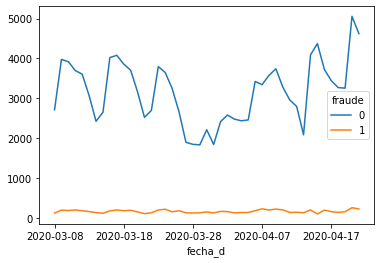

In [85]:
fraude,genuine = plot_fraudes_data()
print (f"Fraude: {fraude} ({fraude/pd_dados.shape[0]})\tGenuine: {genuine} ({genuine/pd_dados.shape[0]})")

## Modelagem

Problemas:

- Balanceamento das classes: 5% de fraude (típico 1%)
- Mudança de comportamento ao longo do tempo
- 

### Período de `2020-03-08` à `2020-03-29`

- 1 semana para teste
- 1 semana de delay
- 1 semana para treino

[Credit Card Fraud Detection: A Realistic Modeling and a Novel Learning Strategy](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=80380080)

#### Distribuição ao longo do período

> Particular care must be taken in practice when splitting the dataset into training and validation sets, due to the sequential nature of credit card transactions, and the delay in fraud reporting.[3]

(24591, 23)
Fraude 169.85714285714286 avg.	Genuine: 3343.1428571428573 avg.
Fraude: 1189 (0.04835102273189378)	Genuine: 23402 (0.9516489772681063)


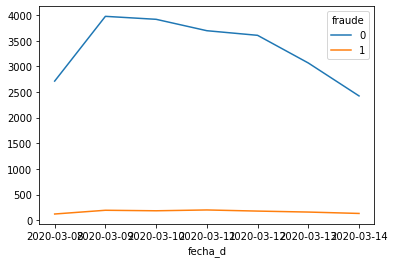

In [86]:
# Treino
dataTrain1 = {'start':'2020-03-08', 'end':'2020-03-14'}
pdfTrain1 = pd_dados.copy()
pdfTrain1 = pdfTrain1[(pdfTrain1['fecha_d']>=dataTrain1['start'])
                      &(pdfTrain1['fecha_d']<=dataTrain1['end'])]
print (pdfTrain1.shape)
fraude,genuine = plot_fraudes_data(dataTrain1['start'], dataTrain1['end'])
print (f"Fraude: {fraude} ({fraude/pdfTrain1.shape[0]})\tGenuine: {genuine} ({genuine/pdfTrain1.shape[0]})")

Fraude 162.42857142857142 avg.	Genuine: 3429.0 avg.


(1137, 24003)

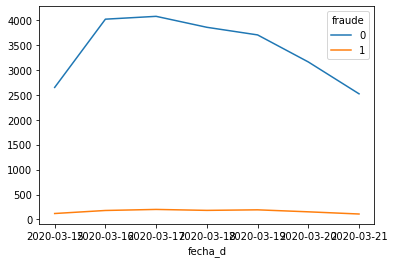

In [87]:
# Delay
dataDelay1 = {'start':'2020-03-15', 'end':'2020-03-21'}
plot_fraudes_data(dataDelay1['start'], dataDelay1['end'])

(20935, 23)
Fraude 163.42857142857142 avg.	Genuine: 2827.285714285714 avg.
Fraude: 1144 (0.054645330785765465)	Genuine: 19791 (0.9453546692142345)


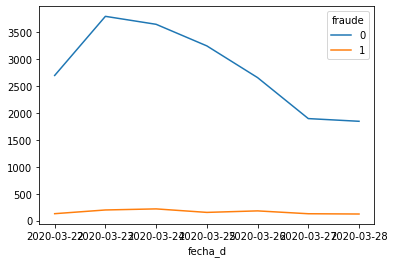

In [88]:
# Teste
dataTest1 = {'start':'2020-03-22', 'end':'2020-03-28'}
pdfTest1 = pd_dados.copy()
pdfTest1 = pdfTest1[(pdfTest1['fecha_d']>=dataTest1['start'])
                      &(pdfTest1['fecha_d']<=dataTest1['end'])]
print (pdfTest1.shape)
fraude,genuine = plot_fraudes_data(dataTest1['start'], dataTest1['end'])
print (f"Fraude: {fraude} ({fraude/pdfTest1.shape[0]})\tGenuine: {genuine} ({genuine/pdfTest1.shape[0]})")

#### Feature Engineering

- `feature transformation`, `feature extraction` or `data preprocessing`.

> The zero/one loss function is a standard loss function for binary classification problems. It is however not well suited for credit card fraud detection problems, due to the high-class imbalance (much more genuine than fraudulent transactions). Estimating the performance of a fraud detection system is a non-trivial issue. [3]

## References

1. [Precision Vs. Recall — Evaluating Model Performance in Credit Card Fraud Detection](https://towardsdatascience.com/precision-vs-recall-evaluating-model-performance-in-credit-card-fraud-detection-bb24958b2723)
1. [Rethinking the Right Metrics for Fraud Detection](https://medium.datadriveninvestor.com/rethinking-the-right-metrics-for-fraud-detection-4edfb629c423)
1. [Fraud-Detection-Handbook](https://github.com/Fraud-Detection-Handbook)
  > logistic regression (LR), decision trees (DT), Random forests (RF), Boosting, and Neural networks/Deep learning (NN/DL). LR and DT were chosen due to their simplicity and interpretability. RF and Boosting were chosen since they are currently considered to be state-of-the-art in terms of performance. NN/DL methods were chosen since they provide promising research directions.
  